# Determinantes del ingreso

__Integrantes:__ 

- Daniel Flores
- Francisco Fernández


## Preliminares

### Problema:

Un organismo no gubernamental  está interesado en las dinámicas socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza extrema, enmarcado dentro de los objetivos del desarrollo del nuevo milenio del Programa de las Naciones Unidas para el Desarrollo.

### Objetivo:

Desarrollar un modelo predictivo de clasificación sobre la probabilidad que un individuo presente salarios bajo los 50.000 dólares anuales, en base a una serie de atributos sociodemográficos $X_i$.

El modelo a estimar es:

$$\log\left(\frac{p({ income \gt 50000})}{1 - p({ income \gt 50000})}\right)={{\beta }_{0} + \sum_{i=1} {\beta }_{i} \cdot {X_{i}}}$$


### Implementación de la solución: 

- Se implementará una regresion logística para la clasificación de los salarios sobre y bajo los 50.000 dolares anuales, binarizando la variable `income` entre 0 y 1.
- El método de optimización es el de la máxima verosimilitud de la función de distribución binomial para la estimación de  parámetros.

### Métricas de evaluación

Se utilizarán las siguientes métricas:

- Matriz de confusión: cantidad de observaciones predichas de forma correcta.
- Accuracy (exactitud): porcentaje de casos predichos correctamente por sobre el total de casos.
- Precision: mide la fracción de predicciones correctas entre las etiquetas positivas.
- Recall: Mide la fraccion de verdaderos positivos predichos por el modelo.
- F1: representa la media armónica entre Precision y Recall (es decir, una medida general de la presición).
- ROC (en particular, AUC): evalúa la relación entre ambos errores (falsos positivos y falso negativo) condicional en todo el rango del clasificador.

Teniendo en consideración que el objetivo es erradización de la pobreza extrema y las dinámicas que determinan la desigualdad de ingresos.

### Estrategia de preprocesamiento de datos:

- Se realizará el siguiente preprocesamiento:
    - Transformación de datos pérdidos, los datos pérdidos simbolizados con `?` que se cambiarán a `NaN`.
    - Recodificación, se seguirá la sugerencia de la organización. Se detalla en sección recodifición.
    - Binarización: se recodificarán las variables binarias, con valor 1 a las categorías minoritarias.

## Aspectos computacionales

Se utilizara las principales librerias para el analisis de datos, las cuales son:

### Bibliotecas de Python 
 
- `pandas`:  Permite realizar tareas de manipulación, agregación y visualización de datos de forma más sencilla.
- `numpy`: Agrega soporte para vectores y matrices y  funciones matemáticas de alto nivel para operar con esos datos. 
- `matplotlib`: Permite crear visualizaciones de datos simples.
- `seaborn`: Permite visualizar modelos estadísticos. Se basa en Matplotlib.
- `statsmodels`: Estimación de modelos estadísticos, en nuestro caso la regresion logística.
- `scikit-learn`: Implementa aprendizaje de máquina, incluye varios algoritmos de clasificación, regresión y métricas, incluyendo varias herramientas útiles, como separación de datos de entrenamiento, validación cruzada y codificación de variables categóricas.
- `factor_analizer`: Permite implementar el EFA (análisis factorial exploratorio).
- `missingno`: Biblioteca para la visualización de datos perdidos.
- `warnings`: Evitará que aparezcan las advertencias de avisos de deprecación.
- `IPython.display`: Embellece el output de salida. 


### Módulos y funciones de Python

- `funciones_def1`: Módulo que contiene función para graficar

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate

import factor_analyzer as factor
import missingno as msngo
import warnings

from IPython.display import display, Markdown

from funciones_def1 import graficar

warnings.filterwarnings('ignore')

## Descripción

### Descripción de datos

La base de datos se encuentra en `income-db.csv`.

Las variables que componen esta base se detallan a continuación:

- `age`: Edad del individuo.
- `workclass`: Naturaleza de la organización que emplea al individuo.
- `education`: Nivel educacional del individuo:Bachelors (Licenciado), Some-college (Superior incompleta), 11th (3ro medio), HS-grad (Secundaria completa), Prof-school (Escuela profesional), Assoc-acdm (Técnico superior administrativo) , Assoc-voc (Técnico superior vocacional), 9th (1ro medio), 7th-8th (7mo-8vo), 12th (4to medio), Masters (Maestría de postgrado), 1st-4th (1ro-4to básico), 10th(2do medio), Doctorate (Doctorado), 5th-6th (5to-6to), Preschool (Preescolar).
- `capital-gains`: Ingresos generados por inversiones fuera del trabajo asalariado = Ingresos generados por inversiones fuera del trabajo asalariado.
- `capital-losses`: Pérdidas generadas por inversiones fuera del trabajo asalariado.
- `fnlwgt`: Ponderador muestral.
- `marital-status`: Estado civil del individuo: Married-civ-spouse (Casado/a régimen civil),Divorced (Divorciado/a), Never-married (Soltero/a), Separated (Separado/a), Widowed (Viudo/a),Married-spouse-absent (Casado con esposo/a ausente), Married-AF-spouse (Casado/a régimen castrense).
- `occupation`: Ocupación del individuo: Tech-support (Soporte técnico), Craft-repair (Reparaciones), Other-service (Otros servicios), Sales (Ventas), Exec-managerial (Ejecutivo administrativos), Prof-specialty (Profesores), Handlers-cleaners (Aseo y ornato), Machine-opinspct (Inspectores de maquinarias), Adm-clerical (Administrativos servicio al cliente), Farmingfishing (Pesca-ganadería), Transport-moving (Transporte), Priv-house-serv (Asesor del hogar), Protective-serv (servicios de seguridad), Armed-Forces (Fuerzas armadas).
- `relationship`: Relación respecto a su familia Wife(Esposa), Own-child (hijo único), Husband (Esposo), Not-in-family (No pertenece a la familia), Other-relative (Familiar de otro tipo),Unmarried (Soltero).
- `race`: Raza del encuestado White(Blanco caucásico), Asian-Pac-Islander (Isleño del Asia Pacífico), Amer-Indian-Eskimo (Pertenenciente a pueblos originarios), Other (Otro grupo), Black (Afroamericano).
- `sex`: Sexo del encuestado.
- `hours-per-week`: Cantidad de horas trabajadas por semana.
- `native-country`: País de origen. United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, HolandNetherlands.
- `income`: `<=50K` Si el individuo percibe ingresos inferiores a 50.000 dólares anuales, `>50K` si el individuo percibe ingresos superiores a 50.000 dólares anuales. Vector objetivo.

#### Datos que no se considerarán

- La columna `educational-num` no es considerada en la muestra por no indicarse su descripción. 
- Los datos del ponderador muestral `fnlwgt` se eliminarán por no ser un dato sociodemográfico.

### Preprocesamiento

In [2]:
# Importa base de datos y reemplaza guion por guion bajo
df = pd.read_csv("income-db.csv")
df.columns = df.columns.str.replace("[-]", "_")

display(Markdown("#### Información de datos no nulos y nombres de columnas"))
display(df.info())

# Almacena nombre de columnas: todas, categóricas y numéricas

var_todas = list(df.columns)
var_categoricas = list(df.select_dtypes(include=['object']).columns)
var_numericas = list(df.select_dtypes(include=['int64']).columns)

# Reemplaza valor nulos por None

display(Markdown("#### Información de datos pérdidos"))

for var in var_todas:
    num_perdidos = df[df[var] == "?"].shape[0]
    if num_perdidos > 0:
        display(Markdown("- Número de datos pérdidos para **"
                         + var + "** " + str(num_perdidos)))

df = df.replace("?", np.nan)

#### Información de datos no nulos y nombres de columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational_num    48842 non-null int64
marital_status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital_gain       48842 non-null int64
capital_loss       48842 non-null int64
hours_per_week     48842 non-null int64
native_country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


None

#### Información de datos pérdidos

- Número de datos pérdidos para **workclass** 2799

- Número de datos pérdidos para **occupation** 2809

- Número de datos pérdidos para **native_country** 857

#### Recodificación

Se aplicará la recodificación sugerida por la organización:

- `occupation` se recodificará como `collars` siguiendo la siguiente nomenclatura:
    - `white-collar` $\leftarrow$ Prof-specialty, Exec-managerial, Adm-clerical, Sales,
Tech-support.
    - `blue-collar` $\leftarrow$ Craft-repair, Machine-op-inspct, Transport-moving, Handlers-cleaners, Farming-fishing, Protective-serv, Priv-house-serv.
    - `others` $\leftarrow$ Other-service, Armed-Forces
- `workclass` se recodificará como `workclass_recod` siguiendo una nomenclatura similar a:
    - `federal-gov` $\leftarrow$ Federal-gov.
    - `state-level-gov` $\leftarrow$ State-gov, Local-gov.
    - `self-employed` $\leftarrow$ Self-emp-inc, Self-emp-not-inc
    - `unemployed` $\leftarrow$ Never-worked, Without-pay.
- `education` se recodifcará como `educ_recod` siguiendo una nomenclatura similar a:
    - `preschool` $\leftarrow$ Preschool
    - `elementary-school` $\leftarrow$ 1st-4th, 5th-6th
    - `high-school` $\leftarrow$ 7th-8th, 9th, 10th,11th, 12th, HS-grad
    - `college` $\leftarrow$ Assoc-voc, Assoc-acdm, Some-college
    - `university` $\leftarrow$ Bachelors, Masters, Prof-school, Doctorate
- `marital-status` se recodificará como `civstatus` siguiendo una nomenclatura similar a:
    - `married` $\leftarrow$ Married-civ-spouse, Married-spouse-absent, Married-AFspouse
    - `divorced` $\leftarrow$ Divorced
    - `separated` $\leftarrow$ Separated
    - `widowed` $\leftarrow$ Widowed.
    - `native-country` debe recodificarse como region donde cada país debe asignarse a uno de los 5 continentes.
- `income` se recodificará de forma binaria

In [3]:
# Reglas de recodificación

recodification_rules = {
    'occupation': {
        'to': 'collars',
        'rules': {
            'white-collar': [
                'Prof-specialty',
                'Exec-managerial',
                'Adm-clerical',
                'Sales',
                'Tech-support'
            ],
            'blue-collar': [
                'Craft-repair',
                'Machine-op-inspct',
                'Transport-moving',
                'Handlers-cleaners',
                'Farming-fishing',
                'Protective-serv',
                'Priv-house-serv'
            ],
            'others': [
                'Other-service',
                'Armed-Forces'
            ],
        },
    },
    'workclass': {
        'to': 'workclass_recod',
        'rules': {
            'private': ['Private'],
            'federal-gov': ['Federal-gov'],
            'state-level-gov': [
                'State-gov',
                'Local-gov'
            ],
            'self-employed': [
                'Self-emp-inc',
                'Self-emp-not-inc'
            ],
            'unemployed': [
                'Never-worked',
                'Without-pay'
            ],
        },
    },
    'education': {
        'to': 'educ_recod',
        'rules': {
            'preschool': ['Preschool'],
            'elementary-school': [
                '1st-4th',
                '5th-6th'
            ],
            'high-school': [
                '7th-8th',
                '9th',
                '10th',
                '11th',
                '12th',
                'HS-grad'
            ],
            'college': [
                'Assoc-voc',
                'Assoc-acdm',
                'Some-college'
            ],
            'university': [
                'Bachelors',
                'Masters',
                'Prof-school',
                'Doctorate'
            ],
        },
    },
    'marital_status': {
        'to': 'civstatus',
        'rules': {
            'married': [
                'Married-civ-spouse',
                'Married-spouse-absent',
                'Married-AF-spouse'
            ],
            'divorced': ['Divorced'],
            'separated': ['Separated'],
            'widowed': ['Widowed'],
            'never-married': ['Never-married'],
        },
    },
    'native_country': {
        'to': 'continent',
        'rules': {
            'asia': [
                'Philippines',
                'India',
                'China',
                'Japan',
                'Vietnam',
                'Iran',
                'Taiwan',
                'Thailand',
                'Hong',
                'Cambodia',
                'Laos',
            ],
            'australia': ['Outlying-US(Guam-USVI-etc)'],
            'europe': [
                'Germany',
                'England',
                'Italy',
                'Poland',
                'Portugal',
                'Greece',
                'France',
                'Ireland',
                'Yugoslavia',
                'Scotland',
                'Hungary',
                'Holand-Netherlands',
            ],
            'north-america': [
                'United-States',
                'Mexico',
                'Puerto-Rico',
                'Canada',
                'El-Salvador',
                'Jamaica',
                'Dominican-Republic',
                'Guatemala',
                'Haiti',
                'Nicaragua',
                'Honduras',
            ],
            'south-america': [
                'Cuba',
                'South',
                'Columbia',
                'Peru',
                'Ecuador',
                'Trinadad&Tobago',
            ],
        },
    },
}

display(Markdown("#### Resultado recodificación"))

df_recod = df.copy()

for original_column in recodification_rules:
    new_column = recodification_rules[original_column]['to']
    rules = recodification_rules[original_column]['rules']

    df_recod[new_column] = None

    for new_value, original_values in rules.items():
        (df_recod
         .loc[df[original_column]
              .isin(original_values), new_column]) = new_value

    display(pd.DataFrame(df_recod[new_column].value_counts()))

# Variables a eliminar

var_eliminar = ["occupation", "workclass",
                "education", "marital_status", "native_country"]

df_recod2 = df_recod.drop(columns=var_eliminar)

#### Resultado recodificación

,collars
white-collar,24819
blue-collar,16276
others,4938


,workclass_recod
private,33906
self-employed,5557
state-level-gov,5117
federal-gov,1432
unemployed,31


,educ_recod
high-school,21353
college,14540
university,12110
elementary-school,756
preschool,83


,civstatus
married,23044
never-married,16117
divorced,6633
separated,1530
widowed,1518


,continent
north-america,45745
asia,981
europe,780
south-america,456
australia,23


### Análisis y visualización de variables

#### Datos pérdidos

#### Información de datos no nulos y nombres de columnas para base de datos recodificada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
fnlwgt             48842 non-null int64
educational_num    48842 non-null int64
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital_gain       48842 non-null int64
capital_loss       48842 non-null int64
hours_per_week     48842 non-null int64
income             48842 non-null object
collars            46033 non-null object
workclass_recod    46043 non-null object
educ_recod         48842 non-null object
civstatus          48842 non-null object
continent          47985 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


None

#### Visualización de datos pérdidos

El porcentaje de datos pérdidos es 0.7%

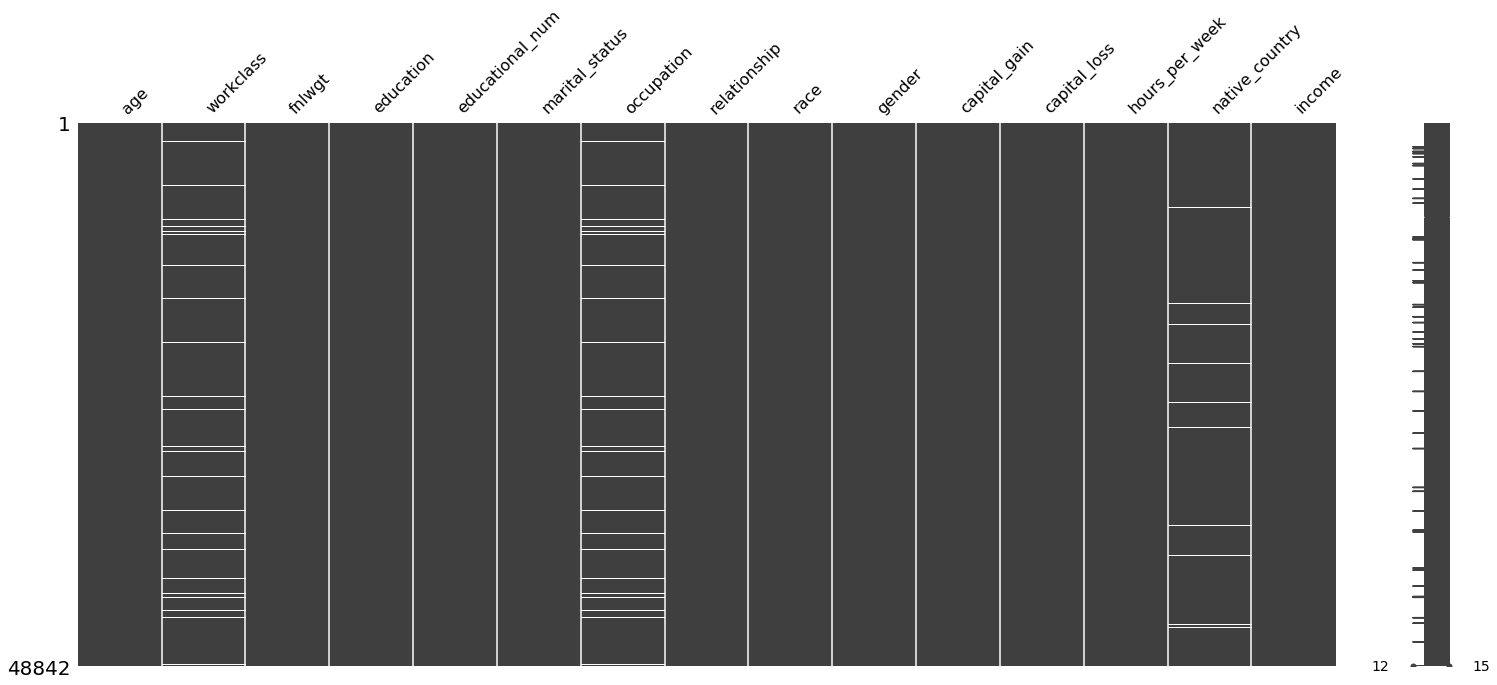

In [4]:
display(Markdown("""#### Información de datos no nulos y nombres de columnas para base de datos recodificada"""))

display(df_recod2.info())

# Almacena por tipo de variable y elimina columnas que no se usarán

var_objetivo = "income"
var_todas = list(df_recod2.columns)
var_todas.remove("educational_num")
var_todas.remove("fnlwgt")

var_atributos = var_todas.copy()
var_atributos.remove(var_objetivo)

var_categoricas = list(
    df_recod2.loc[:, var_todas].select_dtypes(include=['object']).columns)

var_numericas = list(
    df_recod2.loc[:, var_todas].select_dtypes(include=['int64']).columns)

var_cat = var_categoricas.copy()
var_cat.remove(var_objetivo)

# Visualización de datos pérdidos

display(Markdown("#### Visualización de datos pérdidos"))
msngo.matrix(df)

num_datos_perdidos = df_recod2.isnull().sum().sum()
num_datos_totales = df_recod2.shape[0]*df_recod.shape[1]
porc_datos_perdidos = round(num_datos_perdidos/num_datos_totales * 100, 1)

display(
    Markdown(f"El porcentaje de datos pérdidos es {str(porc_datos_perdidos)}%"))

Ya que el porcentaje de datos pérdidos es bajo, se eliminan los registros nulos

In [5]:
df_recod2 = df_recod2.dropna()

#### Visualización de variable objetivo

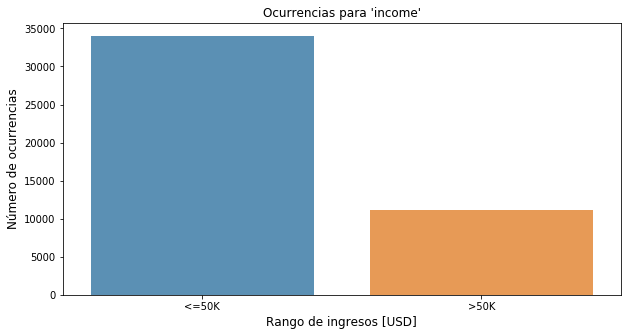

In [6]:
# Visualiza variable objetivo

income_count  = df_recod2["income"].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(income_count.index, income_count.values, alpha=0.8)
plt.title("Ocurrencias para 'income'")
plt.ylabel("Número de ocurrencias", fontsize=12)
plt.xlabel("Rango de ingresos [USD]", fontsize=12)
plt.show()

#### Visualización de variables y estadística descritiva

#### Visualización de datos numéricos

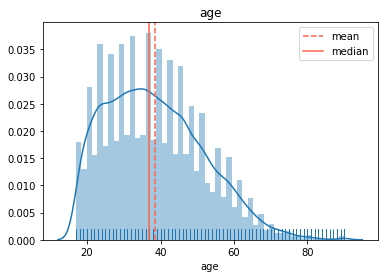

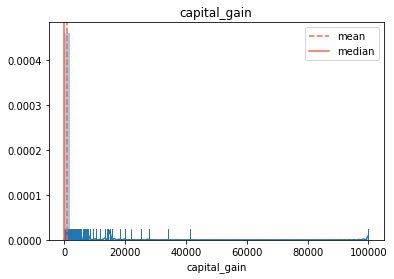

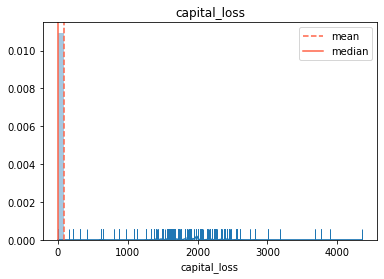

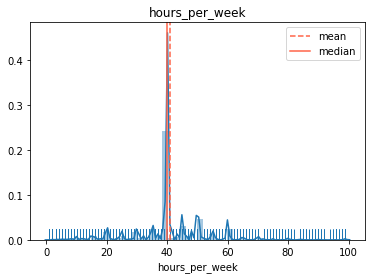

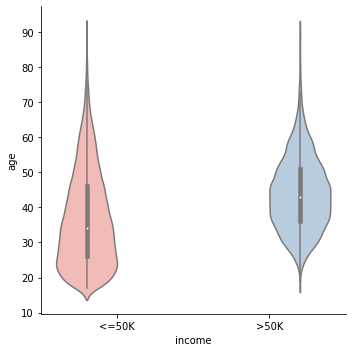

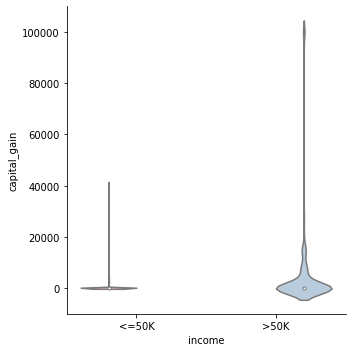

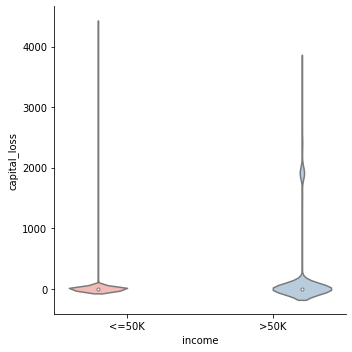

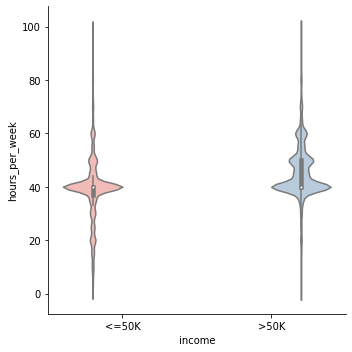

In [39]:
display(Markdown("#### Visualización de datos numéricos"))

for var in var_numericas:
    graficar(df_recod2, var)

for var in var_numericas:
    # plt.figure()
    #ax = sns.catplot(x="income", y=var, data=df_recod2);
    #ax = sns.catplot(x="income", y=var, kind="box", data=df_recod2);
    # sns.catplot(x="income", y=var, kind="boxen",
    #        data=df_recod2);
    sns.catplot(x="income", y=var, hue="income",
                kind="violin", data=df_recod2, palette="Pastel1")

In [8]:
display(Markdown("#### Estadística descriptiva de datos numéricos"))
df_recod2.describe()

#### Estadística descriptiva de datos numéricos

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#### Visualización de número de datos categóricos vs income

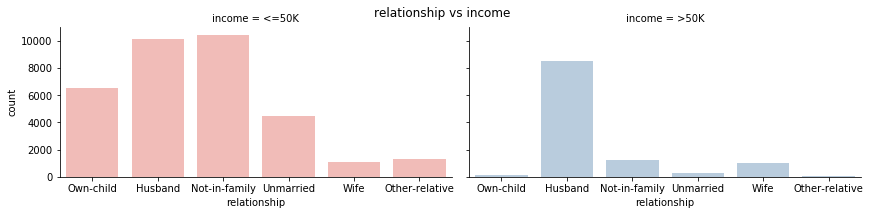

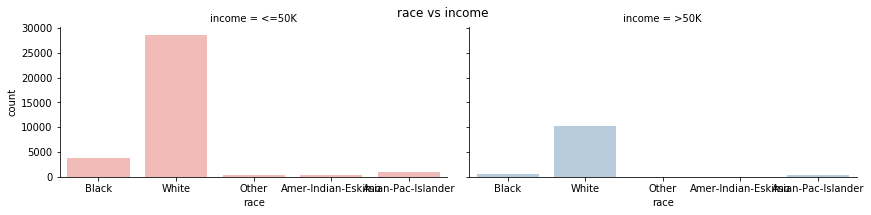

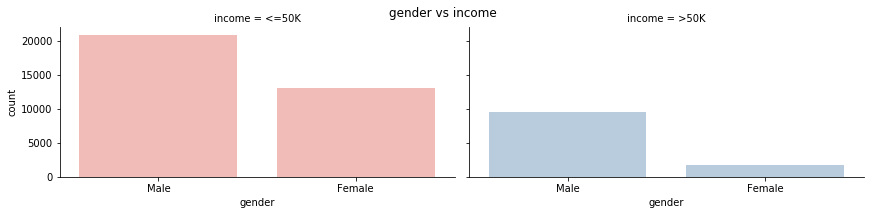

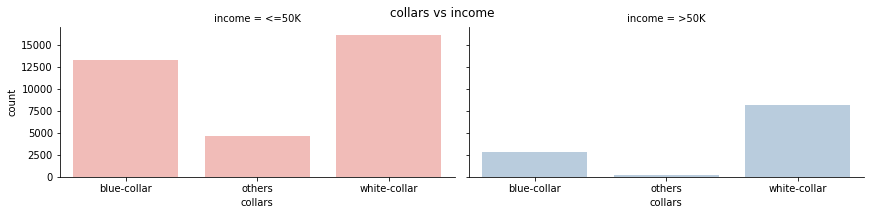

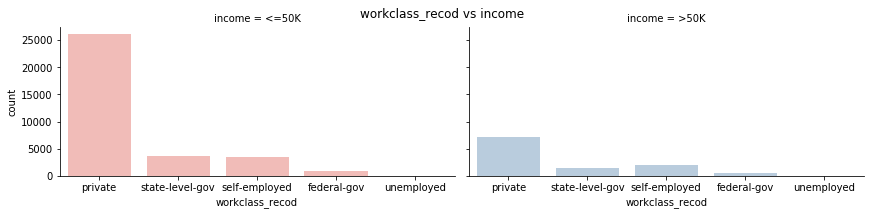

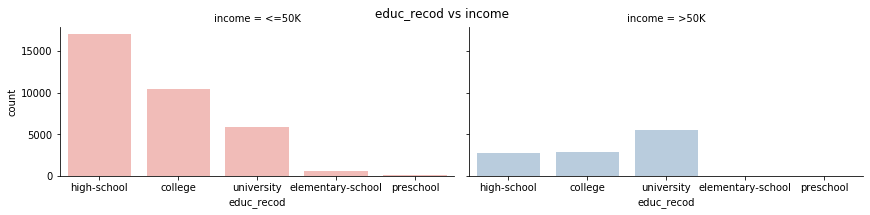

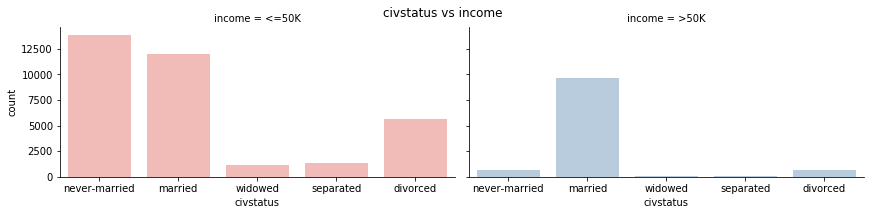

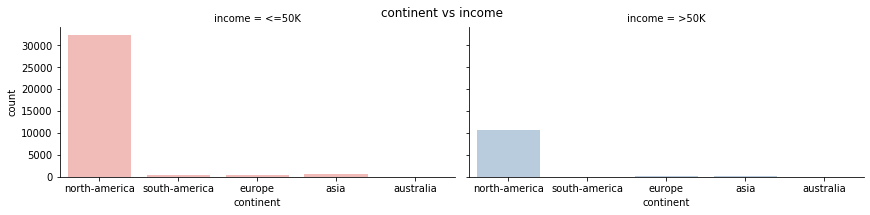

In [9]:
display(Markdown("#### Visualización de número de datos categóricos vs income"))

for var in var_cat:
    g = sns.catplot(x=var, hue="income", col="income", data=df_recod2,
                    kind="count", dodge=False, height=3, aspect=2, palette="Pastel1")
    g.fig.suptitle(var + " vs income")

#### Visualización de porcentaje de datos categóricos vs income

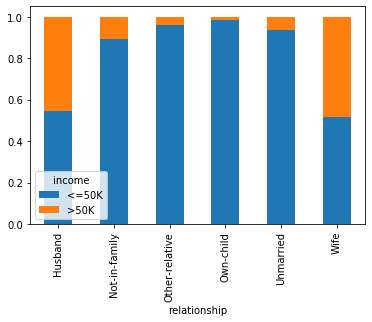

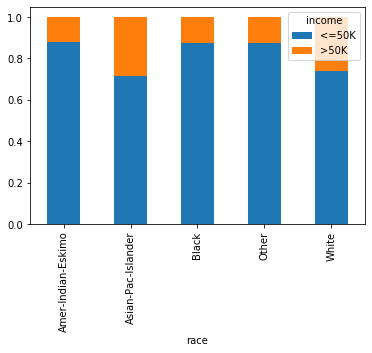

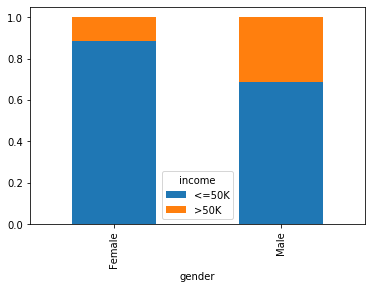

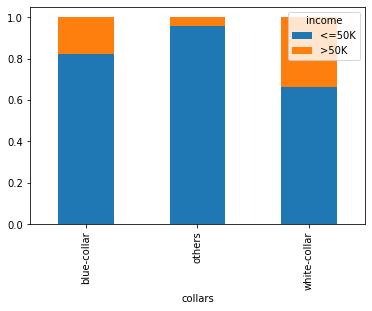

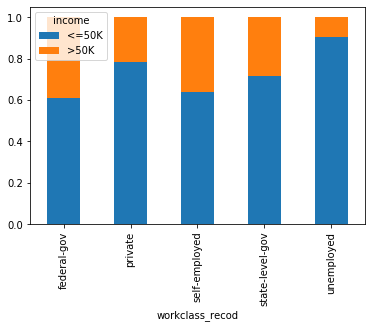

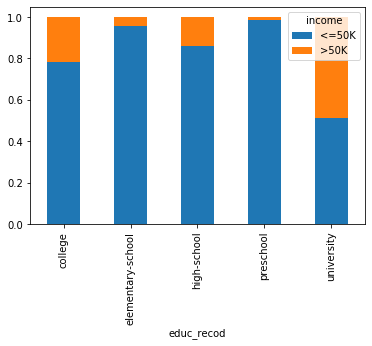

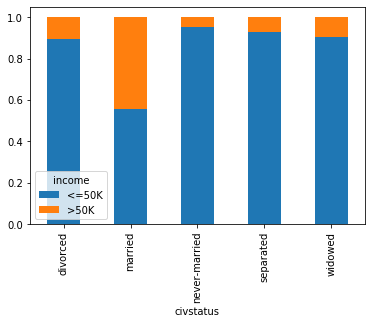

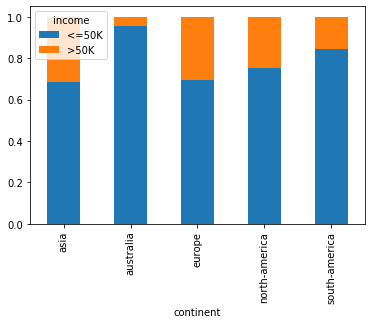

In [10]:
display(Markdown("#### Visualización de porcentaje de datos categóricos vs income"))

for var in var_cat:
    props = df_recod2.groupby(var)["income"].value_counts(
        normalize=True).unstack()
    props.plot(kind="bar", stacked="True")

#### Comentarios de los datos

A partir de los gráficos y la estadística descriptiva se puede decir lo siguiente:

- Edad:
    - La edad promedio de los encuestados es 38 años, su curva de densidad es relativamente simétrica alrededor de la media.
    - Los cuartiles para los ingresos sobre 50K es entre 35 y 55 años.
    - Los cuartiles para los ingresos bajo 50K es entre 25 y 45 años.
    - La distribución de la edad vs los ingresos muestra que los más jóvenes, tienen menores ingresos, y depués de los 50 años los ingresos disminuyen.
    - El rango de edad de los encuestados va entre los 17 y 90 años.
- Ingresos/Pérdidas por inversiones:
    - El número de encuestados que se invierte es bajo.
    - La media sólo explica alrededor de 1000 USD de ingresos y las pérdidas no más de 88 USD.
- Horas trabajadas a la semana:
    - Los cuartiles de las horas trabajadas son 40 y 45 horas.
    - Las personas que ganan sobre 50K trabajan más que las personas con ingresos bajo 50K, considerando los cuartiles. 
- Ingresos:
    - La mayoría de los encuestados gana menos de 50K.
- Relación familiar: 
    - Un alto porcentaje de los casados (>40%), comparado con el resto de las relaciones, tiene ingresos sobre 50K.
    - La gran mayoría de personas que se declaran hijo único, que no tiene familia y que no están casados están en el grupo con ingresos menores a 50K.
    - La mayoría de los encuestados declara ser hombre casado.
- Raza: 
    - Se puede ver que la mayoría de los encuestados se declara de raza blanca.  
    - Un porcentaje alto de las afroamericanos, pueblos originarios y otros (>80%), tiene ingresos menores a 50K.
- Género:
    - La mayoría de encuestados es hombre.
    - Hay un porcentaje mayor de mujeres vs hombres con ingresos menores a 50K.
- Ocupación:
    - La mayoría de las ocupaciones de los encuestados pertenece al grupo white collars, considerado profesiones.
    - El porcentaje de personas con ingresos sobre 50K es mayor en los profesionales que en el resto. 
- Organización:
    - La mayoría de los encuestados trabaja en el sector privado.
    - Un altísimo porcentaje de personas sin empleo gane <50K.
    - El porcentaje de personas con ingresos sobre 50K es mayor en el sector estatal y en los empleos por cuenta propia. 
- Educación:
    - La mayoría de los encuestados llegó hasta high school.
    - El porcentaje de personas con ingresos sobre 50K es mayor en el universitarios. 
- Estado civil:
    - La mayoría de los encuestados está casado.
    - El porcentaje de personas con ingresos sobre 50K es mayor en los casado.
- Continente
    - La gran mayoría de los encuestados se delcara norteaméricano.
    - El porcentaje de personas con ingresos sobre 50K es mayor en Europa, Asia y Norteamérica.

### Conversión de datos categóricos

In [11]:
display(Markdown("#### Codifica datos de categorías y muestra resultados"))

label_encoder = LabelEncoder()

df_recod3 = df_recod2.copy()

for var in var_categoricas:
    display(Markdown(f"**Variable {var}**"))

    df_recod3[var] = label_encoder.fit_transform(df_recod3[var])

    display(pd.DataFrame({
        "original": df_recod2[var].unique(),
        "codificada": df_recod3[var].unique()
    }))

#### Codifica datos de categorías y muestra resultados

**Variable relationship**

,original,codificada
0,Own-child,3
1,Husband,0
2,Not-in-family,1
3,Unmarried,4
4,Wife,5
5,Other-relative,2


**Variable race**

,original,codificada
0,Black,2
1,White,4
2,Other,3
3,Amer-Indian-Eskimo,0
4,Asian-Pac-Islander,1


**Variable gender**

,original,codificada
0,Male,1
1,Female,0


**Variable income**

,original,codificada
0,<=50K,0
1,>50K,1


**Variable collars**

,original,codificada
0,blue-collar,0
1,others,1
2,white-collar,2


**Variable workclass_recod**

,original,codificada
0,private,1
1,state-level-gov,3
2,self-employed,2
3,federal-gov,0
4,unemployed,4


**Variable educ_recod**

,original,codificada
0,high-school,2
1,college,0
2,university,4
3,elementary-school,1
4,preschool,3


**Variable civstatus**

,original,codificada
0,never-married,2
1,married,1
2,widowed,4
3,separated,3
4,divorced,0


**Variable continent**

,original,codificada
0,north-america,3
1,south-america,4
2,europe,2
3,asia,0
4,australia,1


#### Visualización de correlaciones

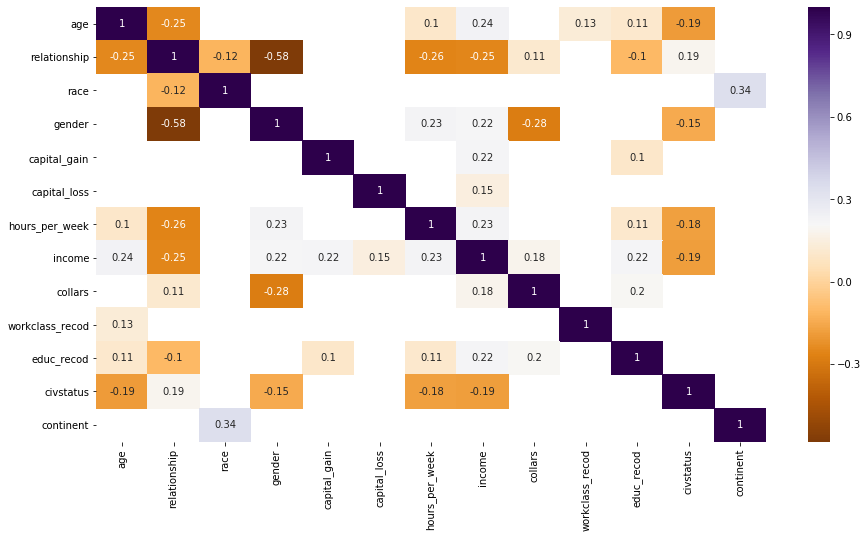

In [12]:
plt.figure(figsize=(15, 8))

m_corr = df_recod3.loc[:, var_todas].corr()

m_corr_filter = m_corr[(
    (m_corr > 0.1) 
    | (m_corr < -0.1)
)].dropna(axis=0, how='all').dropna(axis=1, how='all')

sns.heatmap(m_corr_filter, cmap="PuOr", annot=True)

A partir del heatmap, se ve que income está relacionado en mayor medida con:
    - Edad.
    - Relación familiar.
    - Género.
    - Capital ganado.
    - Capital pérdido.
    - Horas trabajadas a la semana.
    - Ocupación.
    - Nivel educacional.
    - Estado civil.
    
De todas formas los valores de correlación son bajos.

## Modelación descriptiva

### Estrategia

Se estimarán modelos como el definido en la sección objetivo. Se comparán los modelos a partir del AIC y BIC.

Para el modelo seleccionado, se obtendrán los log odds (chances logarítimicas), las que se transformarán a una probabilidad usando la función logística inversa. 

Se verá como afectan los principales coeficientes a la probabilidad de tener ingresos menores a 50K.

Los coeficientes de cada modelo se seleccionarán a partir de modelos saturados, y se irán ajustando los coeficientes a partir de los resultados del análisis en la sección de descripción de datos y el análisis de coeficientes y métricas de cada modelo.

Las información obtenida de modelos y coeficientes se usará en la sección de modelación con machine learning.

### Modelación

#### Modelo descriptivo 1 

In [13]:
atributos = '+'.join(var_atributos)

modelo1_de = smf.logit("income ~ " + atributos, df_recod3).fit()
modelo1_de.summary2(title="Resultados regresion Logit para modelo 1")

Optimization terminated successfully.
         Current function value: 0.405627
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
            Resultados regresion Logit para modelo 1
=================================================================
Model:              Logit            Pseudo R-squared: 0.276     
Dependent Variable: income           AIC:              36712.5493
Date:               2019-07-26 19:23 BIC:              36825.9007
No. Observations:   45222            Log-Likelihood:   -18343.   
Df Model:           12               LL-Null:          -25322.   
Df Residuals:       45209            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        -5.1431   0.1297 -39.6615 0.0000 -5.3972 -4.8889
age               0.0302   0.0011  27.2790 0.0000  0.0280  0.0323
relationship     -0.1544   0.0120 -12.9114 0.0000 -0.1779 -0.1310
race              0.1460   0.0195   7.4727 0.0000  0.1077  0.1843
gender            0.9989   0.0418  23.8831 0.0000  0.9169  1.0809
capital_gain      0.0003   0.0000  39.4946 0.0000  0.0003  0.0003
capital_loss      0.0007   0.0000  24.7135 0.0000  0.0006  0.0007
hours_per_week    0.0303   0.0012  26.1191 0.0000  0.0280  0.0326
collars           0.5439   0.0152  35.7562 0.0000  0.5140  0.5737
workclass_recod  -0.0053   0.0180  -0.2926 0.7699 -0.0405  0.0299
educ_recod        0.2022   0.0089  22.5990 0.0000  0.1847  0.2198
civstatus        -0.4099   0.0185 -22.1824 0.0000 -0.4461 -0.3737
continent        -0.1668   0.0302  -5.5210 0.0000 -0.2260 -0.1076
=================================================================

"""

A partir del modelo se puede ver que las variables capital_gain y capital_loss no son significativamente estadísticas al 95%, por lo que que se sacan del siguiente modelo.

Además que las variables que más influyen son:

1. Género
2. Ocupación.
3. Estado civil.
4. Nivel educacional.
5. Continente.
6. Relación familiar.
7. Raza.

#### Modelo descriptivo 2

In [14]:
# Se eliminan atributos de ingresos/perdidas de capital

var_atributos2 = var_atributos.copy()
var_atributos2.remove("capital_gain")
var_atributos2.remove("capital_loss")

atributos = '+'.join(var_atributos2)

modelo2_de = smf.logit("income ~ " + atributos, df_recod3).fit()
modelo2_de.summary2(title="Resultados regresion Logit para modelo 2")

Optimization terminated successfully.
         Current function value: 0.445284
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
            Resultados regresion Logit para modelo 2
=================================================================
Model:              Logit            Pseudo R-squared: 0.205     
Dependent Variable: income           AIC:              40295.2574
Date:               2019-07-26 19:23 BIC:              40391.1701
No. Observations:   45222            Log-Likelihood:   -20137.   
Df Model:           10               LL-Null:          -25322.   
Df Residuals:       45211            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        -5.2740   0.1228 -42.9429 0.0000 -5.5147 -5.0333
age               0.0344   0.0010  32.9765 0.0000  0.0323  0.0364
relationship     -0.1464   0.0113 -12.9950 0.0000 -0.1684 -0.1243
race              0.1434   0.0184   7.8063 0.0000  0.1074  0.1794
gender            1.0159   0.0391  25.9646 0.0000  0.9392  1.0926
hours_per_week    0.0326   0.0011  29.4421 0.0000  0.0304  0.0347
collars           0.5745   0.0145  39.7384 0.0000  0.5461  0.6028
workclass_recod  -0.0100   0.0171  -0.5878 0.5567 -0.0434  0.0234
educ_recod        0.2268   0.0084  26.8512 0.0000  0.2102  0.2434
civstatus        -0.3874   0.0171 -22.6025 0.0000 -0.4210 -0.3538
continent        -0.1573   0.0285  -5.5169 0.0000 -0.2132 -0.1014
=================================================================

"""

Los coeficientes se mantuvieron similares al del modelo 1, lo mismo sucedió con las variables que más influyen. Pero el valor de AIC y BIC aumentó. El siguiente modelo usará las variables que más influyen según el modelo 2.

#### Modelo descriptivo 3

In [15]:
var_atributos3 = var_atributos.copy()
var_atributos3.remove("capital_gain")
var_atributos3.remove("capital_loss")
var_atributos3.remove("age")
var_atributos3.remove("hours_per_week")


atributos = '+'.join(var_atributos3)

modelo3_de = smf.logit("income ~ " + atributos, df_recod3).fit()
modelo3_de.summary2(title="Resultados regresion Logit para modelo 3")

Optimization terminated successfully.
         Current function value: 0.465779
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
            Resultados regresion Logit para modelo 3
=================================================================
Model:              Logit            Pseudo R-squared: 0.168     
Dependent Variable: income           AIC:              42144.9252
Date:               2019-07-26 19:23 BIC:              42223.3992
No. Observations:   45222            Log-Likelihood:   -21063.   
Df Model:           8                LL-Null:          -25322.   
Df Residuals:       45213            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        -2.4012   0.0983 -24.4247 0.0000 -2.5939 -2.2085
relationship     -0.2532   0.0109 -23.2386 0.0000 -0.2746 -0.2318
race              0.1535   0.0181   8.4905 0.0000  0.1181  0.1889
gender            1.0142   0.0374  27.0911 0.0000  0.9408  1.0875
collars           0.5854   0.0141  41.3923 0.0000  0.5577  0.6131
workclass_recod   0.0646   0.0166   3.9000 0.0001  0.0321  0.0970
educ_recod        0.2424   0.0082  29.4598 0.0000  0.2263  0.2585
civstatus        -0.5532   0.0177 -31.2052 0.0000 -0.5879 -0.5184
continent        -0.1411   0.0281  -5.0252 0.0000 -0.1962 -0.0861
=================================================================

"""

Nuevamente no se mejoraron las métricas (AIC y BIC). En el siguiente modelo se intentrá con las variables con mejor correlación.

#### Modelo descriptivo 4

In [16]:
var_atributos4 = var_atributos.copy()
var_atributos4.remove("race")
var_atributos4.remove("workclass_recod")
var_atributos4.remove("continent")
    
atributos = '+'.join(var_atributos4)

modelo4_de = smf.logit("income ~ " + atributos, df_recod3).fit()
modelo4_de.summary2(title="Resultados regresion Logit para modelo 3")

Optimization terminated successfully.
         Current function value: 0.406350
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
            Resultados regresion Logit para modelo 3
=================================================================
Model:              Logit            Pseudo R-squared: 0.274     
Dependent Variable: income           AIC:              36771.9078
Date:               2019-07-26 19:24 BIC:              36859.1012
No. Observations:   45222            Log-Likelihood:   -18376.   
Df Model:           9                LL-Null:          -25322.   
Df Residuals:       45212            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        -5.1009   0.0951 -53.6333 0.0000 -5.2873 -4.9145
age               0.0301   0.0011  27.3776 0.0000  0.0279  0.0322
relationship     -0.1601   0.0119 -13.4081 0.0000 -0.1835 -0.1367
gender            1.0059   0.0418  24.0874 0.0000  0.9241  1.0878
capital_gain      0.0003   0.0000  39.4754 0.0000  0.0003  0.0003
capital_loss      0.0007   0.0000  24.8205 0.0000  0.0006  0.0007
hours_per_week    0.0304   0.0012  26.2878 0.0000  0.0282  0.0327
collars           0.5476   0.0152  36.0485 0.0000  0.5178  0.5774
educ_recod        0.2050   0.0089  23.0678 0.0000  0.1876  0.2224
civstatus        -0.4144   0.0185 -22.4538 0.0000 -0.4506 -0.3782
=================================================================

"""

El último modelo tiene valores muy similares comparado con el modelo descriptivo 1 de AIC y BIC. Cómo el último modelo utiliza menos variables, para llegar a resultados similares, se usará este modelo para la obtención de probabilidades.